In [43]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\nikhi\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [44]:
df=pd.read_csv(r'C:\Users\nikhi\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1\airlines_flights_data.csv')
df=df.set_index('index')

In [45]:
of_airline= (df['airline'].value_counts()/ len(df))*100
of_airline

airline
Vistara      42.597942
Air_India    26.950255
Indigo       14.366007
GO_FIRST      7.720396
AirAsia       5.363265
SpiceJet      3.002136
Name: count, dtype: float64

In [46]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099


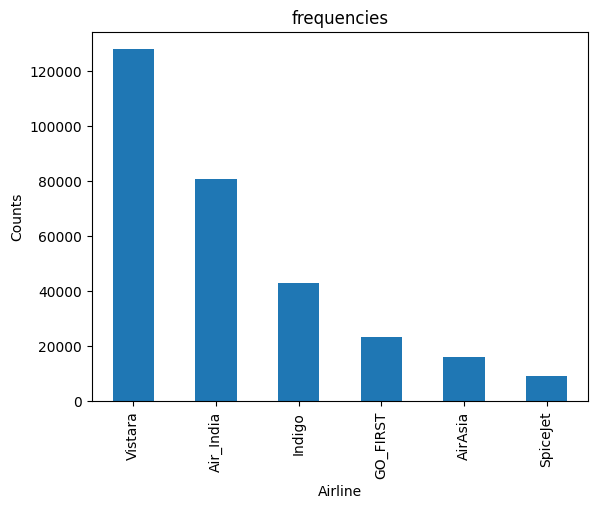

In [47]:
df['airline'].value_counts().plot(kind='bar')

plt.title('frequencies')
plt.xlabel('Airline')
plt.ylabel('Counts')
plt.show()

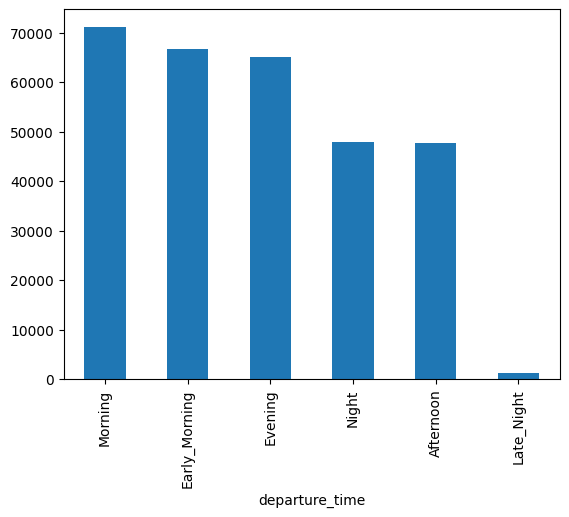

In [48]:
x=df['departure_time'].value_counts().plot(kind='bar')


<Axes: ylabel='destination_city'>

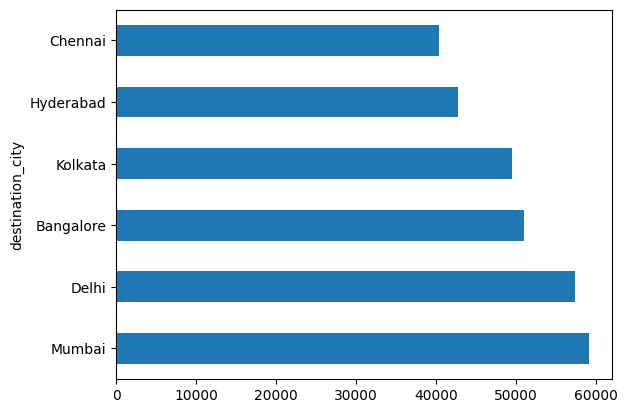

In [49]:
df['destination_city'].value_counts().plot(kind='barh')

<Axes: xlabel='airline', ylabel='price'>

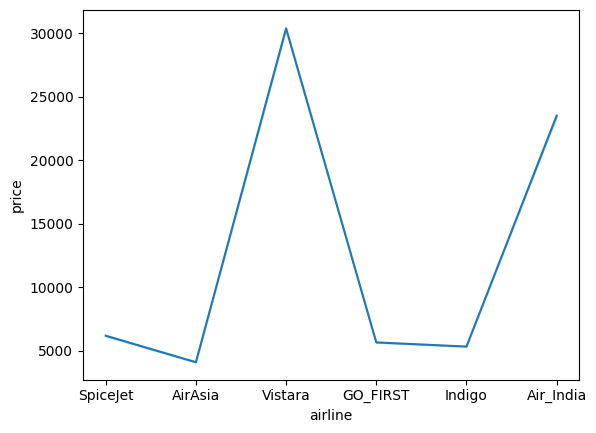

In [50]:
sns.lineplot(x=df['airline'], y=df['price'])

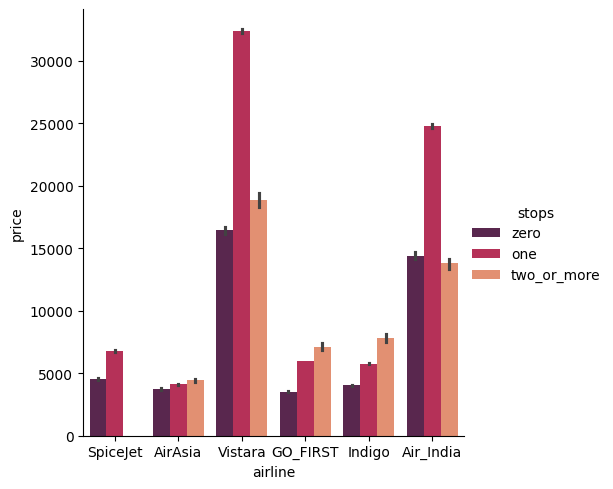

In [53]:
sns.catplot(x=df['airline'], y=df['price'], kind='bar', palette='rocket', hue=df['stops'])

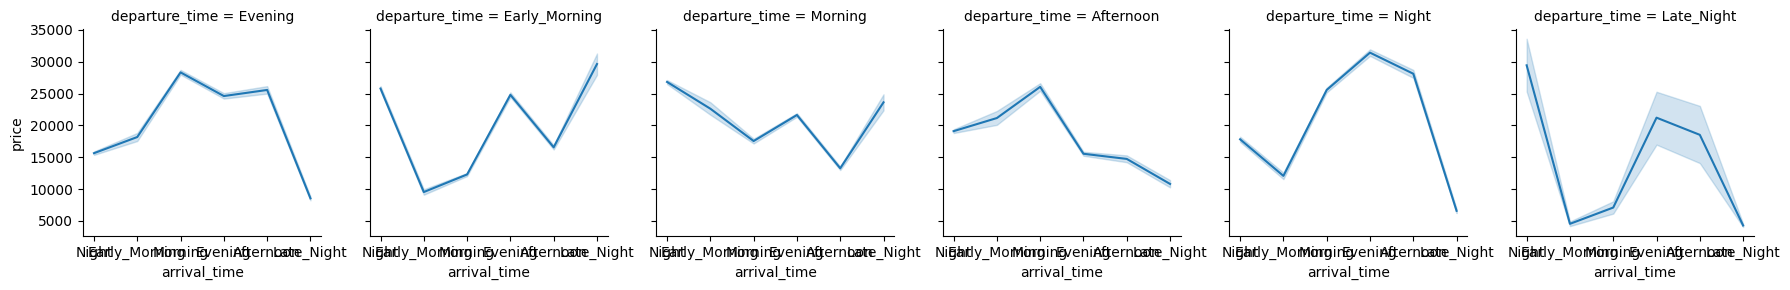

In [57]:
g = sns.FacetGrid(df, col='departure_time')
g.map(sns.lineplot, 'arrival_time', 'price')

In [59]:
df.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [60]:
df.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

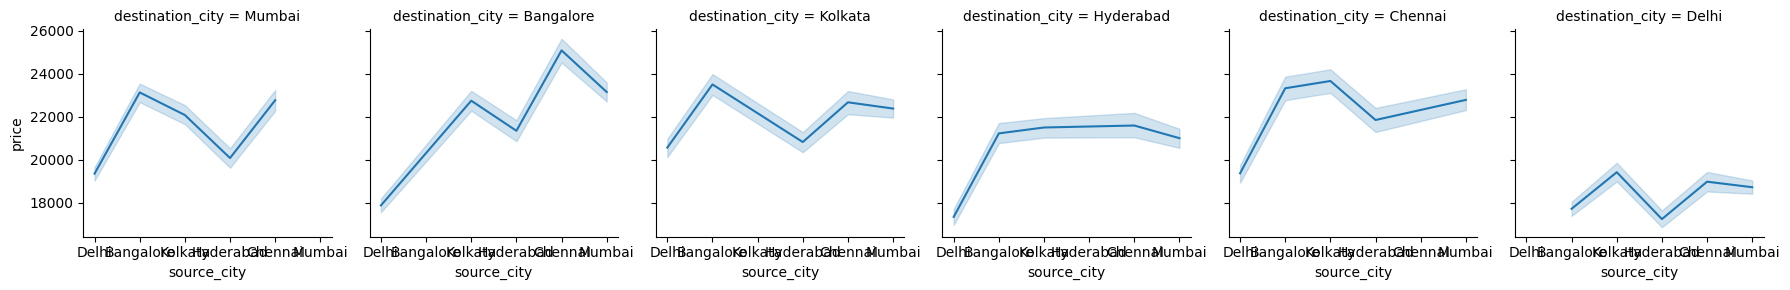

In [61]:
g=sns.FacetGrid(data=df, col='destination_city')
g.map(sns.lineplot, 'source_city', 'price')

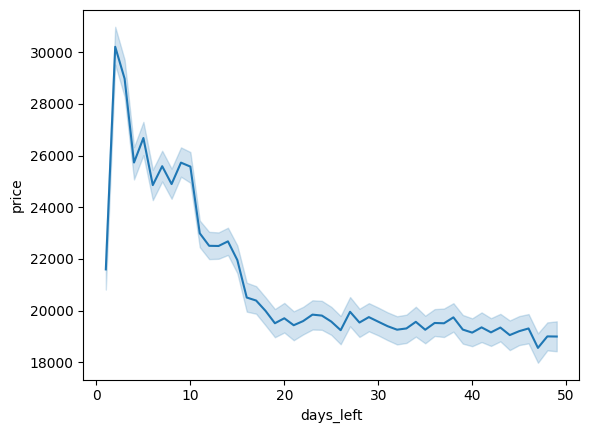

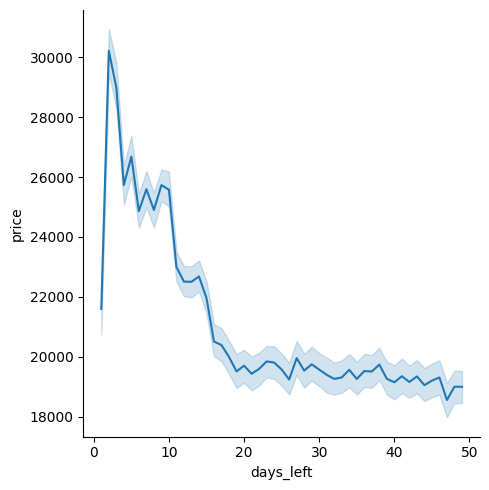

In [63]:
sns.lineplot(y='price', x='days_left', data=df)

sns.relplot(y='price', x='days_left', data=df, kind='line')